In [1]:
#Importamos librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [2]:
#Este conjunto de datos consiste en las 
#calificaciones obtenidas por los estudiantes en varias materias.
url='http://roycekimmons.com/system/generate_data.php?dataset=exams&n=1000'
dataset=read_csv(url)
dataset.shape

(1000, 8)

In [3]:
#Eliminamos las columnas que no vamos a utilizar
dataset=dataset.drop(['race/ethnicity'],axis=1)
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group E,associate's degree,standard,none,64,81,79
1,male,group C,some college,standard,completed,60,68,65
2,female,group C,high school,standard,none,55,66,63
3,female,group C,bachelor's degree,standard,completed,73,83,90
4,female,group D,some high school,standard,completed,69,74,77


In [4]:
#Calculamos el promedio
dataset['Total']=(dataset['reading score']+dataset['writing score']+dataset['math score'])/3
#Condiciones y valores para estudiantes admitidos
conditions=[(dataset['Total']>=65),dataset['Total']<60]
values=[1,0]
dataset['Admitido']=np.select(conditions,values)
dataset.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total,Admitido
0,female,associate's degree,standard,none,64,81,79,74.666667,1
1,male,some college,standard,completed,60,68,65,64.333333,0
2,female,high school,standard,none,55,66,63,61.333333,0
3,female,bachelor's degree,standard,completed,73,83,90,82.000000,1
4,female,some high school,standard,completed,69,74,77,73.333333,1


In [5]:
#Mostramos un resumen estadistico de los datos
dataset.describe()

,math score,reading score,writing score,Total,Admitido
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.358000,69.454000,68.302000,68.038000,0.598000
std,15.457256,14.460948,15.075678,14.263115,0.490547
min,17.000000,25.000000,27.000000,23.000000,0.000000
25%,56.000000,60.000000,58.000000,58.916667,0.000000
50%,67.000000,70.000000,69.000000,68.333333,1.000000
75%,77.000000,80.000000,79.000000,78.666667,1.000000
max,100.000000,100.000000,100.000000,100.000000,1.000000


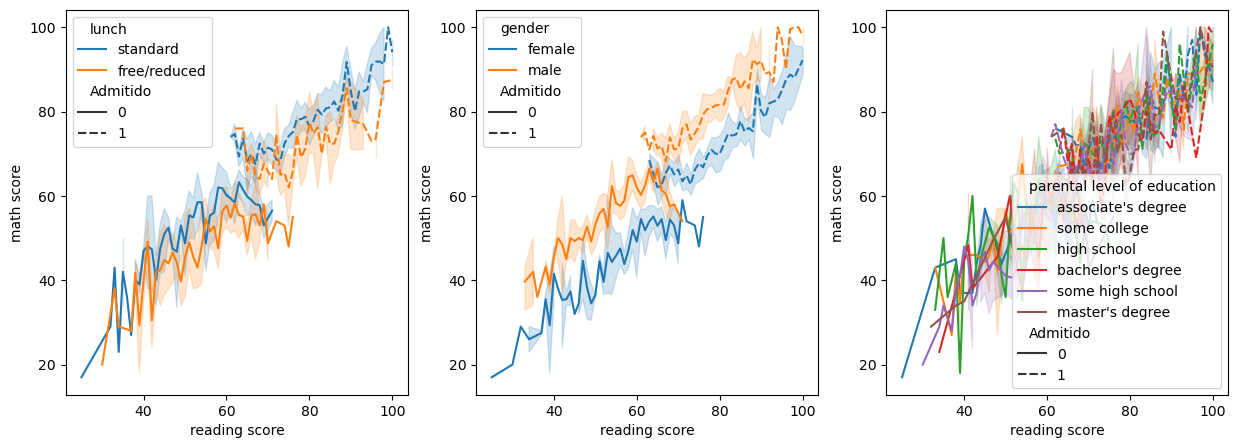

In [6]:
# Solo se utilizo una grafica para analizar cada prueba de escritura,lectura y matemáticas dependiendo de las condiciones
# del estudiante

fig, axes = plt.subplots(1,3, figsize=(15, 5), sharex=True)
sns.lineplot(ax=axes[0],y='math score',x='reading score',hue='lunch',style='Admitido',data=dataset)
sns.lineplot(ax=axes[1],y='math score',x='reading score',hue="gender", style="Admitido",data=dataset)
sns.lineplot(ax=axes[2],y='math score',x='reading score',hue="parental level of education", style="Admitido",data=dataset)
plt.show()

In [7]:
#Media por cada raza, utilizando los diferentes puntajes
dataset.groupby('lunch')[['math score','reading score','writing score',]].mean()

,math score,reading score,writing score
lunch,,,
free/reduced,58.199438,64.165730,62.789326
standard,70.868012,72.377329,71.349379


In [8]:
#Observamos que el nivel educativo de los padres no influye
dataset.groupby('parental level of education')[['math score','reading score','writing score',]].mean()

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.795238,70.871429,69.233333
bachelor's degree,67.471074,71.280992,71.462810
high school,65.621622,67.810811,65.654054
master's degree,71.268293,74.365854,74.146341
some college,67.179372,70.053812,69.121076
some high school,61.407821,65.256983,64.111732


In [9]:
dataset.groupby('test preparation course')[['math score','reading score','writing score',]].mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.474777,74.290801,75.356083
none,64.773756,66.995475,64.716440


In [10]:
#Colocamos las variabes categoricas por numericas y eliminamos los parametros innecesarios
dataset=dataset.drop(['parental level of education'],axis=1)
dataset=pd.get_dummies(dataset,columns=['gender', 'lunch','test preparation course'],drop_first=True)
dataset.head()

,math score,reading score,writing score,Total,Admitido,gender_male,lunch_standard,test preparation course_none
0,64,81,79,74.666667,1,0,1,1
1,60,68,65,64.333333,0,1,1,0
2,55,66,63,61.333333,0,0,1,1
3,73,83,90,82.000000,1,0,1,0
4,69,74,77,73.333333,1,0,1,0


In [17]:
#Dividimos el dataset en 80% de datos para entrenar y un 20% para testeo
X=dataset.drop(['Admitido','Total'],axis=1) #Calificaciones
y=dataset['Admitido'] #Dato a predecir

In [18]:
#Dividir la matriz en subconjuntos aleatorios de datos de prueba y entrenamiento.
X_train, X_validation , Y_train, Y_validation= train_test_split(X,y,test_size=0.20,random_state=1, shuffle=True)

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import HuberRegressor


# Usemos varios algoritmos diferentes para ver qué modelo funciona mejor
models=[]
models.append(('HR: ', HuberRegressor()))
models.append(('RF:',RandomForestRegressor()))
models.append(('LR :', LinearRegression()))
models.append(('SVR :', SVR()))
models.append(('GBC: ', GradientBoostingRegressor()))
models.append(('DT:',DecisionTreeRegressor()))


In [20]:
#Evaluando cada modelo por turno utilizando validacion cruzada
names=[]
results=[]
print('****Resultados****')
for name, model in models:
    model.fit(X_train, Y_train) #Entrenamos
    predictions = model.predict(X_validation ) #Evaluamos
    results.append(predictions) #Agregamos al vector results
    names.append(name) #Agregamos el nombre
    print('%s(%f)' % (name,np.sqrt(mean_squared_error(Y_validation , predictions)))) #Error

****Resultados****
HR: (0.280669)
RF:(0.085041)
LR :(0.280155)
SVR :(0.219278)
GBC: (0.094397)
DT:(0.100000)


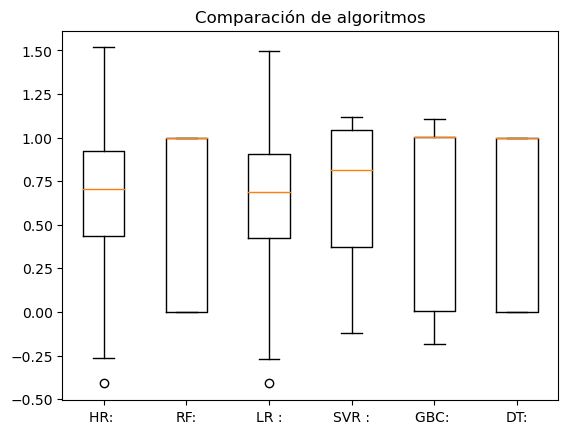

In [21]:
plt.boxplot(results, labels=names)
plt.title('Comparación de algoritmos')
plt.show()

# Regresión utilizando Redes Neuronales

In [16]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
#Particionamos el dataset para prueba y testeo
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [ ]:
#Proceso de Normalizacion
train_stats = dataset.describe()
train_stats = train_stats.transpose()
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

## Construye el modelo
Construyamos nuestro modelo. Aquí, utilizaremos un modelo secuencial con dos capas ocultas densamente conectadas y una capa de salida que devuelve un único valor continuo. Los pasos de construcción del modelo se envuelven en una función, build_model, ya que crearemos un segundo modelo, más adelante.

In [ ]:

def build_model():
    model = keras.Sequential([layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
                              layers.Dense(64, activation='relu'),layers.Dense(1)])
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss='mse',optimizer=optimizer,metrics=['mae', 'mse'])
    return model

In [ ]:
model = build_model()

In [ ]:
#el método .summary para imprimir una descripción simple del modelo
model.summary()

In [ ]:
#Ahora pruebe el modelo. Tome un lote de ejemplos 10 de los datos de entrenamiento y llame amodel.predict en él.
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

## Entrenar a la modelo
Entrene el modelo durante 1000 épocas y registre la precisión de entrenamiento y validación en el objeto history.

In [ ]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 1000

history = model.fit(normed_train_data, train_labels,epochs=EPOCHS, validation_split = 0.2, verbose=0,callbacks=[PrintDot()])

Visualice el progreso de entrenamiento del modelo usando las estadísticas almacenadas en el objeto history.

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

In [ ]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mae'],label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],label = 'Val Error')
    plt.ylim([0,5])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['mse'],label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],label = 'Val Error')
    plt.ylim([0,20])
    plt.legend()
    
    plt.show()


plot_history(history)

Este gráfico muestra poca mejora, o incluso degradación en el error de validación después de aproximadamente 100 épocas. Actualicemos la llamada model.fit para detener automáticamente el entrenamiento cuando el puntaje de validación no mejore. Utilizaremos una * devolución de llamada de EarlyStopping * que pruebe una condición de entrenamiento para cada época. Si transcurre una cantidad determinada de épocas sin mostrar mejoría, entonces detiene automáticamente el entrenamiento.

In [ ]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [ ]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])